In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import warnings 

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [9]:
df = pd.read_csv('clean-data/Whiskey_data/whisky-weather-data.csv')

In [10]:
df.head()

,vintage,avp,size,price,name,precip,temp,max_t,min_t
0,1989,55.2,700,9895.65,Macallan Fine and Rare,2.359011,14.979557,12.444597,5.069920
1,1973,43.2,700,6206.01,Bowmore,2.141950,14.013066,11.784319,4.457495
2,1973,45.2,700,8388.27,Clynelish Single Cask (Wealth Solutions),2.141950,14.013066,11.784319,4.457495
3,1981,54.7,700,4067.04,Port Ellen Feis Ile 2008,2.577374,13.575082,11.439509,4.271147
4,1974,60.8,750,4089.24,Longmorn Cask Strength (Sherrywood),2.341694,14.054673,11.714397,4.680553


In [39]:
df['price/ml'] = 0.0

for i in range(len(df)):
    df.iat[i, 9] = df.iat[i, 3] / df.iat[i, 2]

In [48]:
X = df[['vintage', 'avp', 'size', 'precip', 'temp', 'max_t','min_t']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [119]:
model = Sequential()

In [120]:
model.add(Dense(7, input_dim= 7, kernel_initializer='normal', activation='relu'))

In [121]:
model.add(Dense(1, activation = 'linear'))

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [123]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [124]:
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])

In [125]:
model.fit(X_train_scaled, y_train_scaled, epochs=200, shuffle = True, verbose = 2, validation_split = 0.2, callbacks=callbacks_list)

Train on 2424 samples, validate on 607 samples
Epoch 1/200
 - 0s - loss: 0.9956 - mean_absolute_error: 0.7850 - acc: 0.0000e+00 - val_loss: 0.7620 - val_mean_absolute_error: 0.6668 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.76202, saving model to Weights-001--0.76202.hdf5
Epoch 2/200
 - 0s - loss: 0.8491 - mean_absolute_error: 0.7078 - acc: 0.0000e+00 - val_loss: 0.6852 - val_mean_absolute_error: 0.6404 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 0.76202 to 0.68515, saving model to Weights-002--0.68515.hdf5
Epoch 3/200
 - 0s - loss: 0.7658 - mean_absolute_error: 0.6738 - acc: 0.0000e+00 - val_loss: 0.6402 - val_mean_absolute_error: 0.6266 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 0.68515 to 0.64019, saving model to Weights-003--0.64019.hdf5
Epoch 4/200
 - 0s - loss: 0.7228 - mean_absolute_error: 0.6554 - acc: 0.0000e+00 - val_loss: 0.6049 - val_mean_absolute_error: 0.6059 - val_acc: 0.0000e+00

Epoch 00004: val_loss improved from

In [127]:
model.evaluate(X_train_scaled, y_train_scaled, verbose=1)

3031/3031 [==============================] - 0s 20us/step


[0.6169546234729619, 0.6006750503179461, 0.0]

In [58]:
model.predict(X_train)

array([[182.85948],
       [ 54.78457],
       [176.13098],
       ...,
       [179.93791],
       [178.42323],
       [178.70439]], dtype=float32)

In [73]:
predictions = np.ndarray.flatten(model.predict_on_batch(X_test))

In [74]:
pd.DataFrame({'P':predictions, 'Y':y_test})

,P,Y
2776,182.732025,457.32
2229,178.972351,536.13
1130,190.193130,470.64
2717,51.592091,29.97
4604,178.220230,156.51
3881,186.940948,120.99
3440,185.610367,123.21
2378,190.457336,425.13
3563,139.016830,65.49
2423,189.859573,184.26


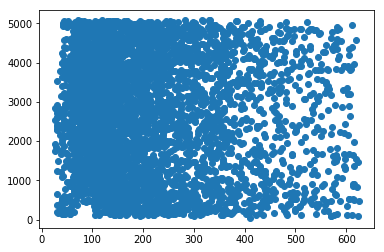

In [75]:
import matplotlib.pyplot as plt
plt.scatter(df['price'], df.index)

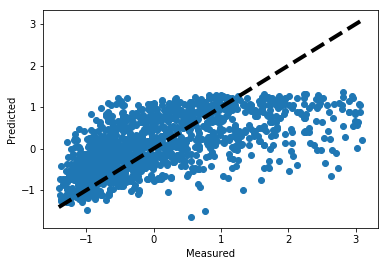

In [130]:
predictions = model.predict(X_test_scaled)
fig, ax = plt.subplots()
ax.scatter(y_test_scaled, predictions)
ax.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [82]:
scaler = StandardScaler()

In [85]:
print(scaler.transform(y_train))

ValueError: Expected 2D array, got 1D array instead:
array=[ 56.61  62.16 124.32 ... 101.01 200.91 197.58].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [98]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.ravel().reshape(-1, 1))

In [112]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train.ravel().reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.ravel().reshape(-1, 1))

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
model.score(X_test, y_test)

0.3511332432400045

In [114]:
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
model.score(X_test_scaled, y_test_scaled)

0.35119951372355196

In [131]:
import seaborn as sns

In [140]:
df = df.loc[(df['price'] > 25) & (df['price'] < 625)]

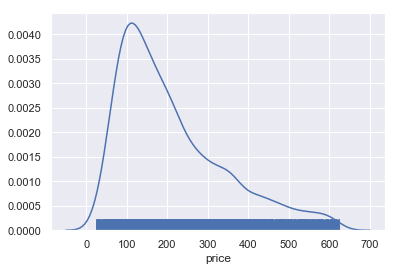

In [141]:
sns.set(color_codes=True)
sns.distplot(df['price'], hist=False, rug=True, bins=10);

In [155]:
price_scaler = StandardScaler().fit(df['price'].values.reshape(-1, 1))

In [160]:
price_scaled = price_scaler.transform(df['price'].values.reshape(-1, 1))

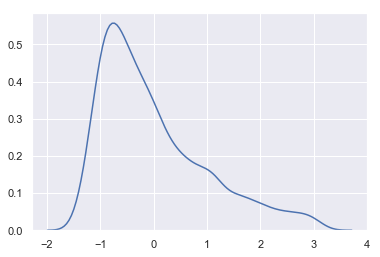

In [161]:
sns.distplot(price_scaled, hist=False)

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
min_max_scaler = MinMaxScaler()

In [165]:
min_max_scaler.fit(df['price'].values.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

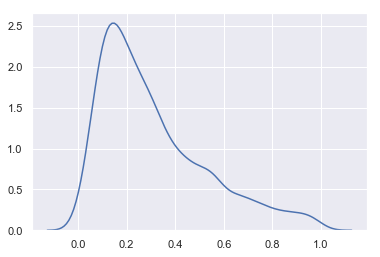

In [166]:
sns.distplot(min_max_scaler.transform(df['price'].values.reshape(-1, 1)), hist = False)